In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
n_input=784
n_output=10
n_hidden_1=512
n_hidden_2=128

In [0]:
import tensorflow as tf
x=tf.placeholder(tf.float32,[None,784])
y_=tf.placeholder(tf.float32,[None,10])

In [0]:
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.062, mean=0)),    #784x512
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.125, mean=0)), #512x128
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output],stddev=0.120, mean=0))  #128x10
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #512x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #128x1
    'out': tf.Variable(tf.random_normal([n_output]))              #10x1
}

In [0]:
epoch=15
batch_size=128

In [0]:
def multilayer_perceptron(x,weights,biases):
#   layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
#   layer_1=tf.nn.relu(layer_1)
#   layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
#   layer_2=tf.nn.relu(layer_2)
#   layer_out=tf.add(tf.matmul(layer_2,weights['out']),biases['out'])
#   layer_out=tf.nn.sigmoid(layer_out)
  return tf.nn.sigmoid(tf.add(tf.matmul(tf.nn.relu(tf.add(tf.matmul(tf.nn.relu(tf.add(tf.matmul(x,weights['h1']),biases['b1'])),weights['h2']),biases['b2'])),weights['out']),biases['out']))

In [0]:
y_hat= multilayer_perceptron(x,weights_relu,biases)

In [0]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=y_))

In [0]:
optimize=tf.train.AdamOptimizer().minimize(loss)

In [0]:
with tf.Session() as sess:
  tf.global_variables_initializer().run()
  xs,ytrs,ytes=[],[],[]
  for e in range(epoch):
    train_avg_cost = 0.
    test_avg_cost = 0.
    total_number_of_batch=int(mnist.train.num_examples/batch_size)
    for _ in range(total_number_of_batch):
      x_batch,y_batch=mnist.train.next_batch(batch_size)
      c,optm,bs,w=sess.run([loss,optimize,biases,weights_relu],feed_dict={x: x_batch, y_: y_batch})
      train_avg_cost += c / total_number_of_batch
      c = sess.run(loss, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
      test_avg_cost += c / total_number_of_batch
    xs.append(e)
    ytrs.append(train_avg_cost)
    ytes.append(test_avg_cost)
    #plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

    if e%2 == 0:
            print("Epoch:", '%04d' % (e+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

  correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

Epoch: 0001 train cost=1.563061564 test cost=1.557097359
Epoch: 0003 train cost=1.490110281 test cost=1.493569227
Epoch: 0005 train cost=1.479536591 test cost=1.486162575
Epoch: 0007 train cost=1.474252731 test cost=1.483447229
Epoch: 0009 train cost=1.471356475 test cost=1.481708676
Epoch: 0011 train cost=1.469693501 test cost=1.480676581
Epoch: 0013 train cost=1.468166800 test cost=1.480516887
Epoch: 0015 train cost=1.467445928 test cost=1.480189919
Accuracy: 0.9806


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


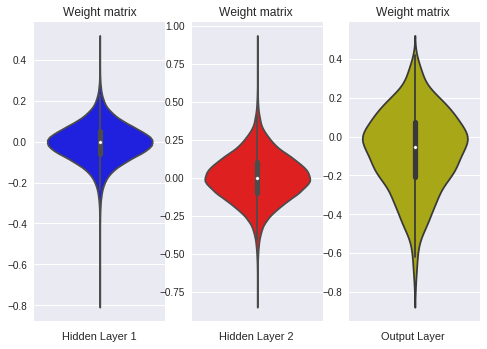

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()